In [2]:
import pandas as pd

In [18]:
df = pd.read_csv("./data/advertising.csv")

In [19]:
import boto3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from JsonModel.utility import getDataFilePath
import uuid

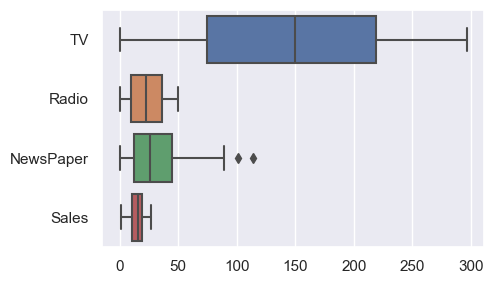

In [20]:
sns.set(rc={'figure.figsize':(5,3)})

sns.boxplot(data=df, orient="h")
plt.tight_layout()
plt.subplots_adjust(left= 0.2)
plt.savefig("test.png")

In [ ]:
!pip3 install sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
def ApplyStandardization(df):
    scale= StandardScaler()
    X = df[df.columns[:-1]]
    scaled_data = scale.fit_transform(X)
    df_scaled = pd.DataFrame(scaled_data,columns = df.columns[:-1])
    df_scaled[df.columns[-1]] = df[df.columns[-1]]
    return df_scaled

df = pd.read_csv("./data/iris.csv")

ApplyStandardization(df)

In [ ]:
import warnings
from sklearn.datasets import load_boston


In [ ]:
from sklearn.preprocessing import Normalizer
def ApplyNormalization(df):
    scale= Normalizer()
    X = df[df.columns[:-1]]
    scaled_data = scale.fit_transform(X)
    df_scaled = pd.DataFrame(scaled_data,columns = df.columns[:-1])
    df_scaled[df.columns[-1]] = df[df.columns[-1]]
    return df_scaled

df = pd.read_csv("./data/boston.csv")

ApplyStandardization(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
def ApplyStandardization(df):
    scale= StandardScaler()
    X = df[df.columns[:-1]]
    scaled_data = scale.fit_transform(X)
    df_scaled = pd.DataFrame(scaled_data,columns = df.columns[:-1])
    df_scaled[df.columns[-1]] = df[df.columns[-1]]
    return df_scaled

df = pd.read_csv("./data/boston.csv")

ApplyStandardization(df)

In [ ]:
df

In [ ]:
df = pd.read_csv("./data/iris.csv")
df

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/boston.csv")
X = df[list(df.columns[:-1])]
y = list(df[df.columns[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def LinearRegressionModel(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr = lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {"Model":lr,"Scores":{"mae":mae,"mse":mse,"rmse":rmse}}

In [ ]:
LinearRegressionModel(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score

def DecissionTreeClassifierModel(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    print(y_train)
    print(clf.predict(X_train))
    return {"Model":clf,"Scores":
            {"Train Accuracy":accuracy_score(y_train, clf.predict(X_train)),
            "Test Accuracy":accuracy_score(y_test,clf.predict(X_test))}
           }

In [ ]:
DecissionTreeClassifierModel(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score

def DecissionTreeRegressorModel(X_train, X_test, y_train, y_test):
    clf = DecisionTreeRegressor()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {"Model":clf,"Scores":{"mae":mae,"mse":mse,"rmse":rmse}}
    

In [ ]:
DecissionTreeRegressorModel(X_train, X_test, y_train, y_test)

In [2]:
import pandas as pd
df = pd.read_csv("./data/iris.csv")


In [2]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,variety
count,150.000000,149.000000,149.000000,150.000000,150.000000
mean,5.843333,3.057718,3.773826,1.199333,1.000000
std,0.828066,0.437311,1.760543,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
import pandas as pd
import numpy as np
def removeOutliers_IQR(df):
    df_copy = df.copy()
    df_copy = df_copy.dropna(axis=0)
    for i in df_copy.columns:
        df_copy = removeOutliers_IQR_col(df_copy,i)
    return df_copy

def removeOutliers_IQR_col(df,col):
    df_copy = df.copy()
    Q3 = np.quantile(df_copy[col], 0.75)
    Q1 = np.quantile(df_copy[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df_copy[col] if ((x > lower_range) & (x < upper_range))]
    return df_copy.loc[df_copy[col].isin(outlier_free_list)]

df_new = removeOutliers_IQR(df)

In [14]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,variety
count,150.000000,149.000000,149.000000,150.000000,150.000000
mean,5.843333,3.057718,3.773826,1.199333,1.000000
std,0.828066,0.437311,1.760543,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df_new.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,variety
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,5.868750,3.037500,3.840278,1.234722,1.034722
std,0.833601,0.398752,1.746938,0.754967,0.814323
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.350000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def removeOutliers_ZScore(df):
    df_copy = df.copy()
    df_copy = df_copy.dropna(axis=0)
    for i in df_copy.columns:
        df_copy = removeOutliers_ZScore_col(df_copy,i)
    return df_copy

def removeOutliers_ZScore_col(df,col):
    df_copy = df.copy()
    upperLimit = df_copy[col].mean() + 3*df_copy[col].std()
    lowerLimit = df_copy[col].mean() - 3*df_copy[col].std()
    return df_copy[(df_copy[col] < upperLimit) & (df_copy[col] > lowerLimit)]

df_new = removeOutliers_ZScore(df)

In [12]:
df_new.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,variety
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.855782,3.045578,3.805442,1.218367,1.020408
std,0.830426,0.424301,1.751273,0.757973,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.200000,6.900000,2.500000,2.000000
